In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def __1D_variable_density_mask__(center_fraction, under_rate, num_echoes=8):
    im_size = 256
    center_size = int(im_size * center_fraction)
    center_start = (im_size - center_size) // 2
    center_end = center_start + center_size

    total_masks = np.empty((num_echoes, im_size, im_size))
    x = np.arange(0, im_size)

    for echo in range(num_echoes):
        echo_mask = np.zeros((im_size, im_size))
        echo_mask[:, center_start:center_end] = 1
        sampled_columns = []
        while True:
            curr_sample = np.random.normal(np.mean(x), np.std(x), 1).astype(int)
            if (curr_sample < 0) or (curr_sample >= im_size): continue
            if (curr_sample >= center_start) and (curr_sample <= center_end): continue
            if curr_sample not in sampled_columns: sampled_columns.append(curr_sample)
            if len(sampled_columns) == (im_size // under_rate) - center_size: break
        for col in sampled_columns:
            echo_mask[:, col] = 1
        total_masks[echo] = echo_mask
    
    return total_masks

In [13]:
def merge_mask(total_masks):
    num_echoes, H, _ = total_masks.shape
    H_per_echo = H // num_echoes
    result_mask = np.zeros((H, H))
    for echo in range(num_echoes):
        curr_mask = total_masks[echo]
        result_mask[:, echo*H_per_echo:(echo+1)* H_per_echo] = curr_mask[:H_per_echo, :].transpose()
    
    return result_mask

In [24]:
masks = __1D_variable_density_mask__(0.05, 5)
mask = merge_mask(masks)

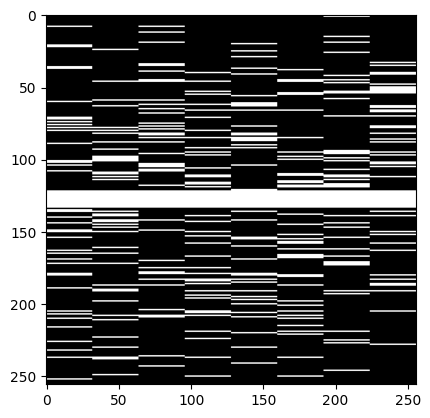

In [25]:
plt.imshow(mask, cmap="gray")